Forest_Fires Prediction (Cleaned Version)

In [1]:
pip install -U pandasql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
# set to display all the columns in dataset
pd.set_option("display.max_columns",None)
#to run sql quries on data frame
import pandasql as psql

In [2]:
#loading the dataset
forest_fires=pd.read_csv(r"C:\22B91A5740\Projects\forestfires(ISRO).csv",header=0)
#creating the backup file for the dataset
forest_fires_bk=forest_fires.copy()
forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Status
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [3]:
#checking the first 5 records
forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Status
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [4]:
#checking the null values in the dataset
forest_fires.isnull().sum()

X         0
Y         0
month     0
day       0
FFMC      0
DMC       0
DC        0
ISI       0
temp      0
RH        0
wind      0
rain      0
area      0
Status    0
dtype: int64

In [5]:
#checking the duplicate values in the dataset
forest_fires.duplicated().any()

True

In [6]:
#Display the unique values of all the variables 
forest_fires.nunique()

X           9
Y           7
month      12
day         7
FFMC      106
DMC       215
DC        219
ISI       119
temp      192
RH         75
wind       21
rain        7
area      251
Status      2
dtype: int64

In [7]:
#display the unique values by count for 'Status'
forest_fires['Status'].value_counts()

Status
1    509
0      8
Name: count, dtype: int64

In [8]:
#Count the target or dependent variable by '0' and '1' and their proportion
#(> 10:1, then the dataset is imbalance data)
Status_count=forest_fires.Status.value_counts()
print("Class 0: ",Status_count[0])
print("Class 1: ",Status_count[1])
print("Proportion: ",round(Status_count[1]/Status_count[0],2),':1')
print("Total records: ",len(forest_fires))

Class 0:  8
Class 1:  509
Proportion:  63.62 :1
Total records:  517


In [9]:
#info of the dataset
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
 13  Status  517 non-null    int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 56.7+ KB


In [10]:
forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Status
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [11]:
# ---- Cell 13 replacement: cyclical encoding for month/day ----
import numpy as np
import pandas as pd

# operate on a copy then overwrite to be safe
df = forest_fires.copy()

month_map = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
             'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
day_map = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7}

def to_month_num(v):
    if pd.isna(v): return np.nan
    if isinstance(v, str):
        v2 = v.strip().lower()[:3]
        return month_map.get(v2, np.nan)
    try:
        return int(v)
    except:
        return np.nan

def to_day_num(v):
    if pd.isna(v): return np.nan
    if isinstance(v, str):
        v2 = v.strip().lower()[:3]
        return day_map.get(v2, np.nan)
    try:
        return int(v)
    except:
        return np.nan

df['month_num'] = df['month'].apply(to_month_num)
df['day_num']   = df['day'].apply(to_day_num)

# cyclical transforms
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)
df['day_sin']   = np.sin(2 * np.pi * df['day_num'] / 7)
df['day_cos']   = np.cos(2 * np.pi * df['day_num'] / 7)

# drop originals and temporary numeric cols
df.drop(columns=['month','day','month_num','day_num'], inplace=True)

forest_fires = df  # overwrite original DF for downstream cells
print("Cyclical month/day features added. New shape:", forest_fires.shape)


Cyclical month/day features added. New shape: (517, 16)


In [12]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          517 non-null    int64  
 1   Y          517 non-null    int64  
 2   FFMC       517 non-null    float64
 3   DMC        517 non-null    float64
 4   DC         517 non-null    float64
 5   ISI        517 non-null    float64
 6   temp       517 non-null    float64
 7   RH         517 non-null    int64  
 8   wind       517 non-null    float64
 9   rain       517 non-null    float64
 10  area       517 non-null    float64
 11  Status     517 non-null    int64  
 12  month_sin  517 non-null    float64
 13  month_cos  517 non-null    float64
 14  day_sin    517 non-null    float64
 15  day_cos    517 non-null    float64
dtypes: float64(12), int64(4)
memory usage: 64.8 KB


In [13]:
#display the Descriptive statistics
forest_fires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Status,month_sin,month_cos,day_sin,day_cos
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,5.170000e+02,5.170000e+02,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.984526,-0.541053,-2.202066e-01,-6.059765e-02,0.109757
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.123547,0.702852,4.074885e-01,7.070413e-01,0.697339
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,-1.000000,-1.000000e+00,-9.749279e-01,-0.900969
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,1.000000,-1.000000,-5.000000e-01,-7.818315e-01,-0.222521
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000,-0.866025,-1.836970e-16,-2.449294e-16,-0.222521
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000,-0.500000,-1.836970e-16,7.818315e-01,0.623490
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000e+00,9.749279e-01,1.000000


In [14]:
#Identify the independent and Target(dependent) variables
IndepVar=[]
for col in forest_fires.columns:
    if col!='Status':
        IndepVar.append(col)
TargetVar='Status'
x=forest_fires[IndepVar]
y=forest_fires[TargetVar]

In [15]:
# Random oversampling can be implemented using the RandomOverSampler class
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.125)
x_over,y_over = oversample.fit_resample(x,y)
print(x_over.shape)
print(y_over.shape)

(572, 15)
(572,)


In [16]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)
# Display the shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((400, 15), (172, 15), (400,), (172,))

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_train=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
x_test=scaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [18]:
Status_count=y_train.value_counts()
print("Proportion: ",round(Status_count[1]/Status_count[0],2),':1')

Proportion:  9.81 :1


In [20]:
KNN_Results=pd.read_csv(r"C:\22B91A5740\Projects\KNN_Results.csv",header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN algorithm 

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[146   0]
 [  6  20]]
Outcome values : 
 146 0 6 20
Classification report : 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98       146
           0       1.00      0.77      0.87        26

    accuracy                           0.97       172
   macro avg       0.98      0.88      0.92       172
weighted avg       0.97      0.97      0.96       172

Accuracy : 96.5 %
Precision : 96.1 %
Recall : 100.0 %
F1 Score : 0.98
Specificity or True Negative Rate : 76.9 %
Balanced Accuracy : 88.5 %
MCC : 0.86
roc_auc_score: 0.885


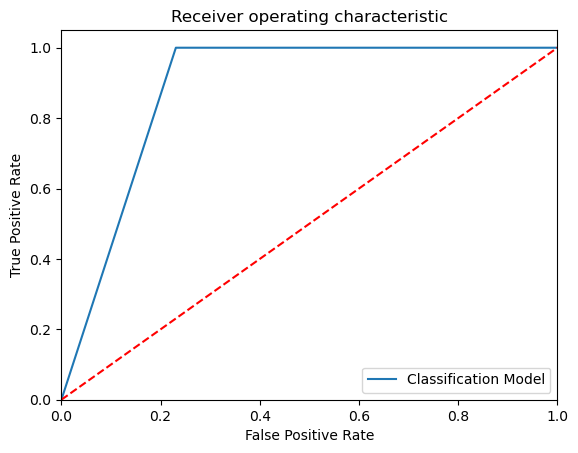

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[141   5]
 [  1  25]]
Outcome values : 
 141 5 1 25
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.97      0.98       146
           0       0.83      0.96      0.89        26

    accuracy                           0.97       172
   macro avg       0.91      0.96      0.94       172
weighted avg       0.97      0.97      0.97       172

Accuracy : 96.5 %
Precision : 99.3 %
Recall : 96.6 %
F1 Score : 0.979
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 96.4 %
MCC : 0.875
roc_auc_score: 0.964


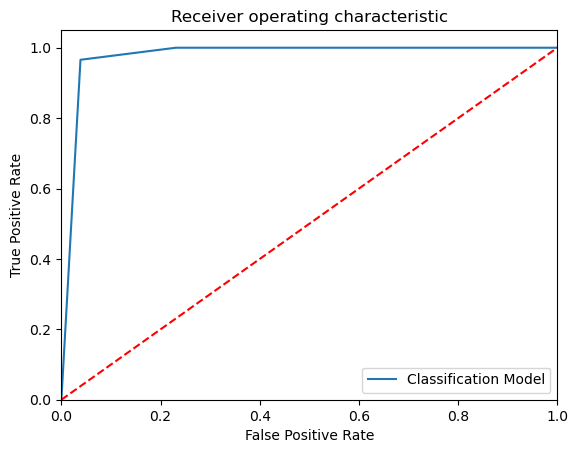

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[141   5]
 [  1  25]]
Outcome values : 
 141 5 1 25
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.97      0.98       146
           0       0.83      0.96      0.89        26

    accuracy                           0.97       172
   macro avg       0.91      0.96      0.94       172
weighted avg       0.97      0.97      0.97       172

Accuracy : 96.5 %
Precision : 99.3 %
Recall : 96.6 %
F1 Score : 0.979
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 96.4 %
MCC : 0.875
roc_auc_score: 0.964


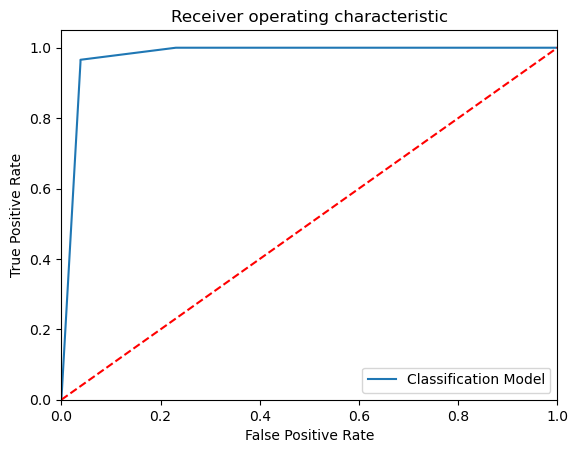

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[140   6]
 [  1  25]]
Outcome values : 
 140 6 1 25
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.96      0.98       146
           0       0.81      0.96      0.88        26

    accuracy                           0.96       172
   macro avg       0.90      0.96      0.93       172
weighted avg       0.96      0.96      0.96       172

Accuracy : 95.9 %
Precision : 99.3 %
Recall : 95.9 %
F1 Score : 0.976
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 96.0 %
MCC : 0.858
roc_auc_score: 0.96


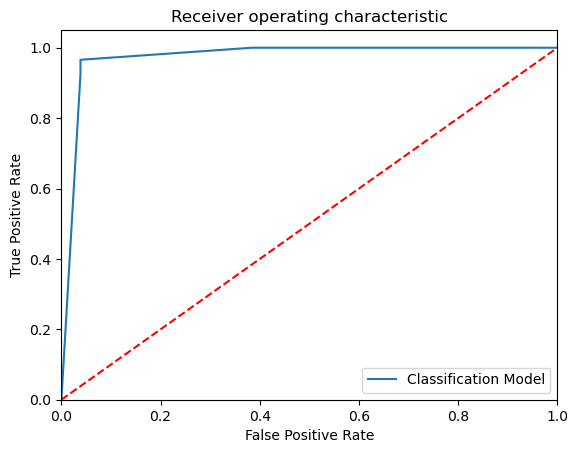

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[140   6]
 [  1  25]]
Outcome values : 
 140 6 1 25
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.96      0.98       146
           0       0.81      0.96      0.88        26

    accuracy                           0.96       172
   macro avg       0.90      0.96      0.93       172
weighted avg       0.96      0.96      0.96       172

Accuracy : 95.9 %
Precision : 99.3 %
Recall : 95.9 %
F1 Score : 0.976
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 96.0 %
MCC : 0.858
roc_auc_score: 0.96


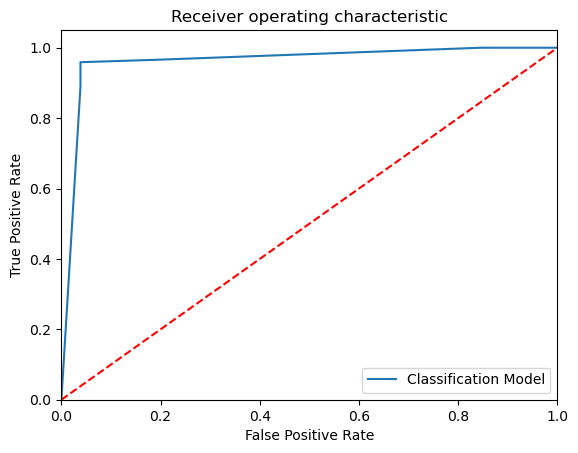

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[135  11]
 [  1  25]]
Outcome values : 
 135 11 1 25
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.92      0.96       146
           0       0.69      0.96      0.81        26

    accuracy                           0.93       172
   macro avg       0.84      0.94      0.88       172
weighted avg       0.95      0.93      0.93       172

Accuracy : 93.0 %
Precision : 99.3 %
Recall : 92.5 %
F1 Score : 0.957
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 94.4 %
MCC : 0.78
roc_auc_score: 0.943


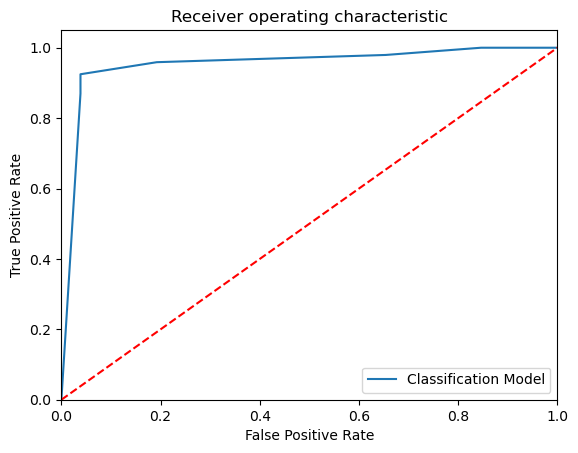

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[135  11]
 [  5  21]]
Outcome values : 
 135 11 5 21
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.92      0.94       146
           0       0.66      0.81      0.72        26

    accuracy                           0.91       172
   macro avg       0.81      0.87      0.83       172
weighted avg       0.92      0.91      0.91       172

Accuracy : 90.7 %
Precision : 96.4 %
Recall : 92.5 %
F1 Score : 0.944
Specificity or True Negative Rate : 80.8 %
Balanced Accuracy : 86.6 %
MCC : 0.674
roc_auc_score: 0.866


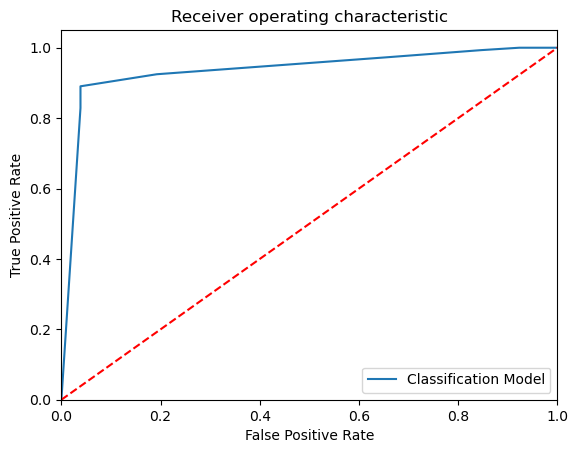

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[130  16]
 [  5  21]]
Outcome values : 
 130 16 5 21
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.89      0.93       146
           0       0.57      0.81      0.67        26

    accuracy                           0.88       172
   macro avg       0.77      0.85      0.80       172
weighted avg       0.90      0.88      0.89       172

Accuracy : 87.8 %
Precision : 96.3 %
Recall : 89.0 %
F1 Score : 0.925
Specificity or True Negative Rate : 80.8 %
Balanced Accuracy : 84.9 %
MCC : 0.609
roc_auc_score: 0.849


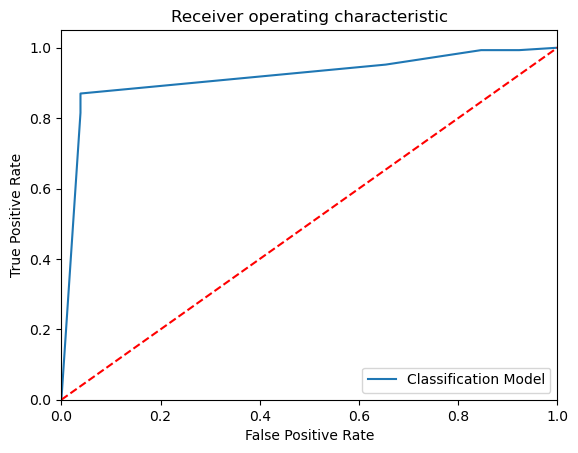

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[138   8]
 [ 17   9]]
Outcome values : 
 138 8 17 9
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.95      0.92       146
           0       0.53      0.35      0.42        26

    accuracy                           0.85       172
   macro avg       0.71      0.65      0.67       172
weighted avg       0.84      0.85      0.84       172

Accuracy : 85.5 %
Precision : 89.0 %
Recall : 94.5 %
F1 Score : 0.917
Specificity or True Negative Rate : 34.6 %
Balanced Accuracy : 64.6 %
MCC : 0.35
roc_auc_score: 0.646


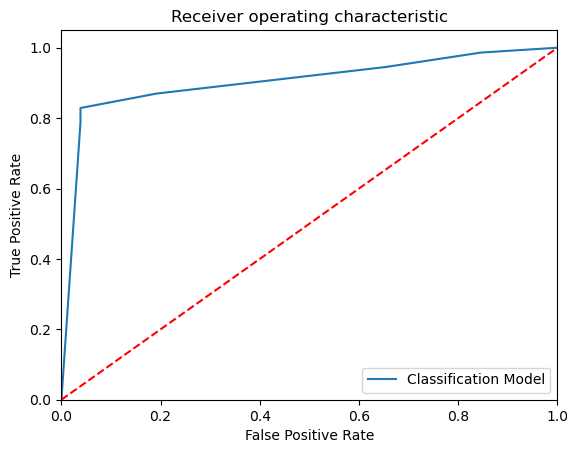

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[135  11]
 [ 17   9]]
Outcome values : 
 135 11 17 9
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.92      0.91       146
           0       0.45      0.35      0.39        26

    accuracy                           0.84       172
   macro avg       0.67      0.64      0.65       172
weighted avg       0.82      0.84      0.83       172

Accuracy : 83.7 %
Precision : 88.8 %
Recall : 92.5 %
F1 Score : 0.906
Specificity or True Negative Rate : 34.6 %
Balanced Accuracy : 63.6 %
MCC : 0.303
roc_auc_score: 0.635


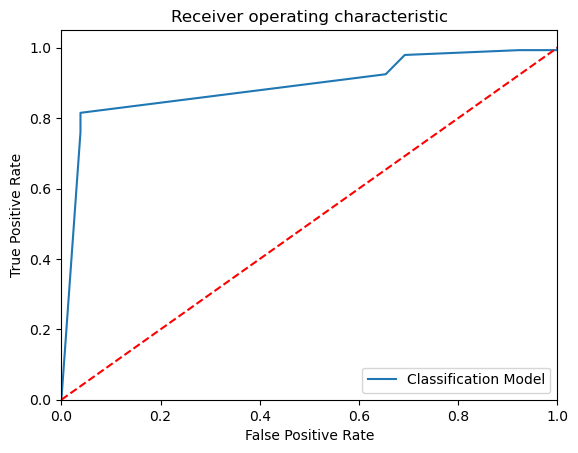

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[140   6]
 [ 18   8]]
Outcome values : 
 140 6 18 8
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.96      0.92       146
           0       0.57      0.31      0.40        26

    accuracy                           0.86       172
   macro avg       0.73      0.63      0.66       172
weighted avg       0.84      0.86      0.84       172

Accuracy : 86.0 %
Precision : 88.6 %
Recall : 95.9 %
F1 Score : 0.921
Specificity or True Negative Rate : 30.8 %
Balanced Accuracy : 63.4 %
MCC : 0.349
roc_auc_score: 0.633


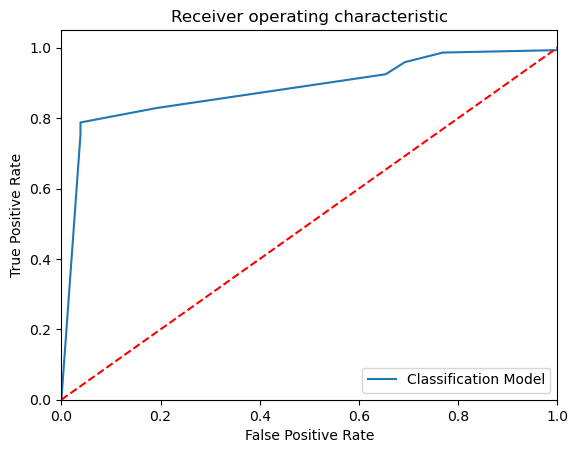

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[140   6]
 [ 18   8]]
Outcome values : 
 140 6 18 8
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.96      0.92       146
           0       0.57      0.31      0.40        26

    accuracy                           0.86       172
   macro avg       0.73      0.63      0.66       172
weighted avg       0.84      0.86      0.84       172

Accuracy : 86.0 %
Precision : 88.6 %
Recall : 95.9 %
F1 Score : 0.921
Specificity or True Negative Rate : 30.8 %
Balanced Accuracy : 63.4 %
MCC : 0.349
roc_auc_score: 0.633


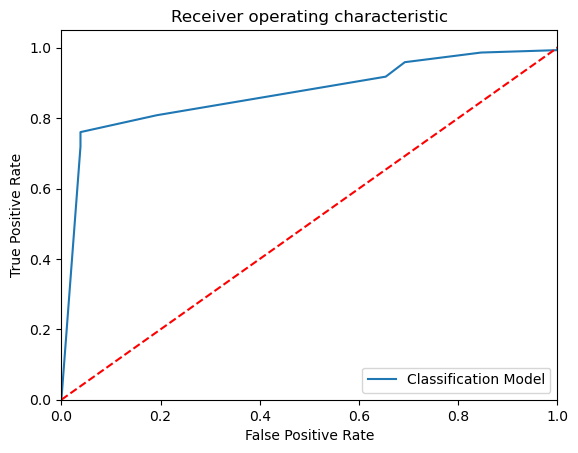

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[142   4]
 [ 20   6]]
Outcome values : 
 142 4 20 6
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.97      0.92       146
           0       0.60      0.23      0.33        26

    accuracy                           0.86       172
   macro avg       0.74      0.60      0.63       172
weighted avg       0.83      0.86      0.83       172

Accuracy : 86.0 %
Precision : 87.7 %
Recall : 97.3 %
F1 Score : 0.922
Specificity or True Negative Rate : 23.1 %
Balanced Accuracy : 60.2 %
MCC : 0.311
roc_auc_score: 0.602


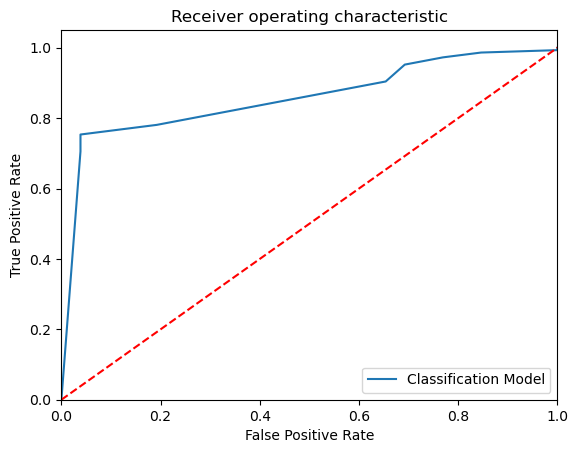

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[142   4]
 [ 20   6]]
Outcome values : 
 142 4 20 6
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.97      0.92       146
           0       0.60      0.23      0.33        26

    accuracy                           0.86       172
   macro avg       0.74      0.60      0.63       172
weighted avg       0.83      0.86      0.83       172

Accuracy : 86.0 %
Precision : 87.7 %
Recall : 97.3 %
F1 Score : 0.922
Specificity or True Negative Rate : 23.1 %
Balanced Accuracy : 60.2 %
MCC : 0.311
roc_auc_score: 0.602


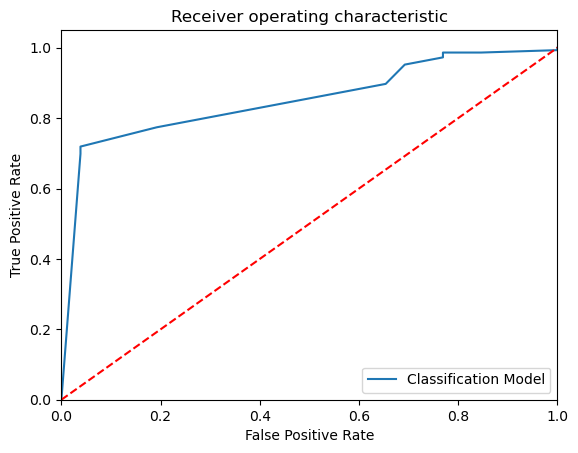

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[142   4]
 [ 20   6]]
Outcome values : 
 142 4 20 6
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.97      0.92       146
           0       0.60      0.23      0.33        26

    accuracy                           0.86       172
   macro avg       0.74      0.60      0.63       172
weighted avg       0.83      0.86      0.83       172

Accuracy : 86.0 %
Precision : 87.7 %
Recall : 97.3 %
F1 Score : 0.922
Specificity or True Negative Rate : 23.1 %
Balanced Accuracy : 60.2 %
MCC : 0.311
roc_auc_score: 0.602


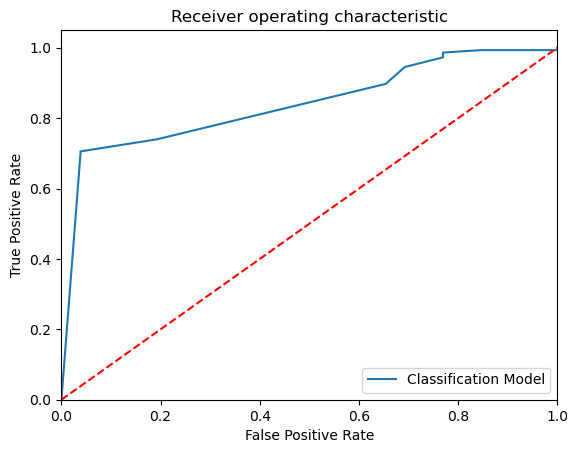

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[142   4]
 [ 20   6]]
Outcome values : 
 142 4 20 6
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.97      0.92       146
           0       0.60      0.23      0.33        26

    accuracy                           0.86       172
   macro avg       0.74      0.60      0.63       172
weighted avg       0.83      0.86      0.83       172

Accuracy : 86.0 %
Precision : 87.7 %
Recall : 97.3 %
F1 Score : 0.922
Specificity or True Negative Rate : 23.1 %
Balanced Accuracy : 60.2 %
MCC : 0.311
roc_auc_score: 0.602


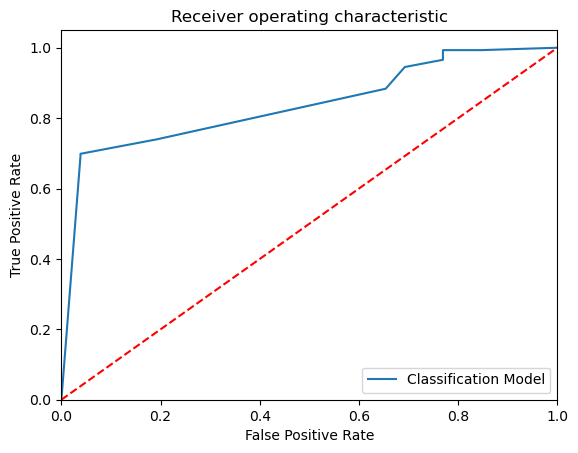

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[144   2]
 [ 20   6]]
Outcome values : 
 144 2 20 6
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.99      0.93       146
           0       0.75      0.23      0.35        26

    accuracy                           0.87       172
   macro avg       0.81      0.61      0.64       172
weighted avg       0.86      0.87      0.84       172

Accuracy : 87.2 %
Precision : 87.8 %
Recall : 98.6 %
F1 Score : 0.929
Specificity or True Negative Rate : 23.1 %
Balanced Accuracy : 60.8 %
MCC : 0.369
roc_auc_score: 0.609


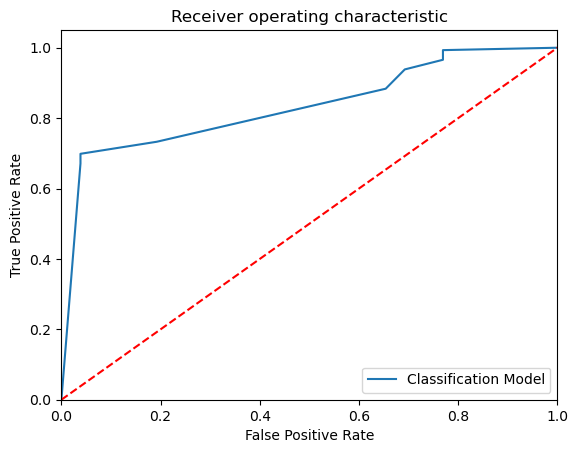

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[144   2]
 [ 20   6]]
Outcome values : 
 144 2 20 6
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.99      0.93       146
           0       0.75      0.23      0.35        26

    accuracy                           0.87       172
   macro avg       0.81      0.61      0.64       172
weighted avg       0.86      0.87      0.84       172

Accuracy : 87.2 %
Precision : 87.8 %
Recall : 98.6 %
F1 Score : 0.929
Specificity or True Negative Rate : 23.1 %
Balanced Accuracy : 60.8 %
MCC : 0.369
roc_auc_score: 0.609


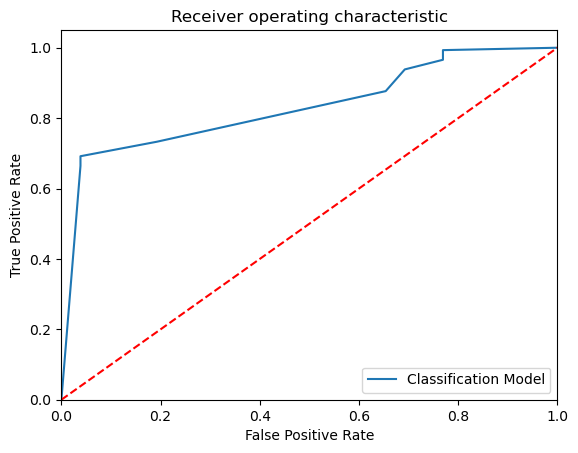

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[144   2]
 [ 20   6]]
Outcome values : 
 144 2 20 6
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.99      0.93       146
           0       0.75      0.23      0.35        26

    accuracy                           0.87       172
   macro avg       0.81      0.61      0.64       172
weighted avg       0.86      0.87      0.84       172

Accuracy : 87.2 %
Precision : 87.8 %
Recall : 98.6 %
F1 Score : 0.929
Specificity or True Negative Rate : 23.1 %
Balanced Accuracy : 60.8 %
MCC : 0.369
roc_auc_score: 0.609


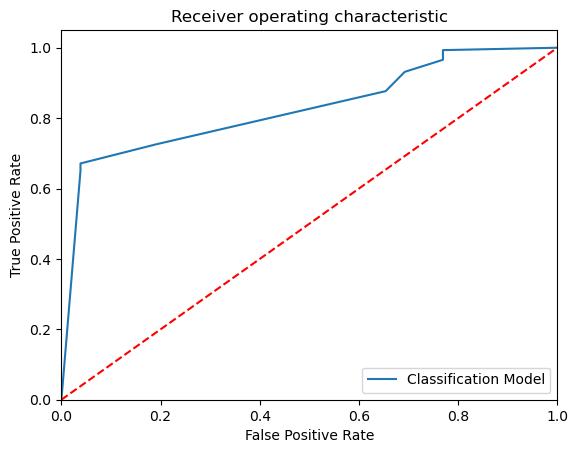

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[144   2]
 [ 20   6]]
Outcome values : 
 144 2 20 6
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.99      0.93       146
           0       0.75      0.23      0.35        26

    accuracy                           0.87       172
   macro avg       0.81      0.61      0.64       172
weighted avg       0.86      0.87      0.84       172

Accuracy : 87.2 %
Precision : 87.8 %
Recall : 98.6 %
F1 Score : 0.929
Specificity or True Negative Rate : 23.1 %
Balanced Accuracy : 60.8 %
MCC : 0.369
roc_auc_score: 0.609


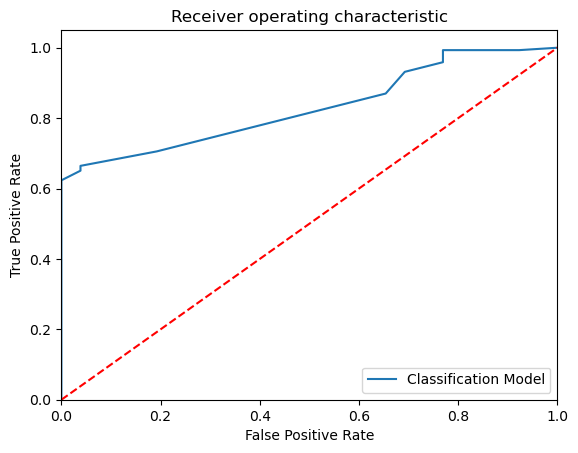

In [21]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
   
    k = a
   
    # Build the model
   
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
   
    # Train the model
   
    ModelKNN.fit(x_train, y_train)
   
    # Predict the model
   
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
   
    print('KNN_K_value = ', a)
   
    # Print the model name
   
    print('Model Name: ', ModelKNN)
   
    # confusion matrix in sklearn
   
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
   
    # actual values
   
    actual = y_test
   
    # predicted values
   
    predicted = y_pred
   
    # confusion matrix
   
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
   
    # outcome values order in sklearn
   
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
   
    # classification report for precision, recall f1-score and accuracy
   
    C_Report = classification_report(actual,predicted,labels=[1,0])
   
    print('Classification report : \n', C_Report)
   
    # calculating the metrics
   
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
   
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
   
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model
   
    from math import sqrt
   
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
   
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
   
    # Area under ROC curve
   
    from sklearn.metrics import roc_curve, roc_auc_score
   
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
   
    # ROC Curve
   
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = pd.concat([KNN_Results, pd.DataFrame([new_row])], ignore_index=True)


    #------KNN_Results------------------------------------------------------------------------

In [22]:
KNN_Results.head(20)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,146,0,6,20,0.965,0.961,1.000,0.980,0.769,0.860,0.884615,0.885
1,KNeighborsClassifier(n_neighbors=2),2,141,5,1,25,0.965,0.993,0.966,0.979,0.962,0.875,0.963646,0.964
2,KNeighborsClassifier(n_neighbors=3),3,141,5,1,25,0.965,0.993,0.966,0.979,0.962,0.875,0.963646,0.964
3,KNeighborsClassifier(n_neighbors=4),4,140,6,1,25,0.959,0.993,0.959,0.976,0.962,0.858,0.960221,0.960
4,KNeighborsClassifier(),5,140,6,1,25,0.959,0.993,0.959,0.976,0.962,0.858,0.960221,0.960
5,KNeighborsClassifier(n_neighbors=6),6,135,11,1,25,0.930,0.993,0.925,0.957,0.962,0.780,0.943098,0.944
6,KNeighborsClassifier(n_neighbors=7),7,135,11,5,21,0.907,0.964,0.925,0.944,0.808,0.674,0.866175,0.866
7,KNeighborsClassifier(n_neighbors=8),8,130,16,5,21,0.878,0.963,0.890,0.925,0.808,0.609,0.849052,0.849
8,KNeighborsClassifier(n_neighbors=9),9,138,8,17,9,0.855,0.890,0.945,0.917,0.346,0.350,0.645680,0.646
9,KNeighborsClassifier(n_neighbors=10),10,135,11,17,9,0.837,0.888,0.925,0.906,0.346,0.303,0.635406,0.636


In [24]:
EMResults1=pd.read_csv(r"C:\22B91A5740\Projects\EMResults.csv",header=0)
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM Linear kernel

Model Name:  SVM - Linear
Confusion matrix : 
 [[146   0]
 [ 26   0]]
Outcome values : 
 146 0 26 0
Classification report : 
               precision    recall  f1-score   support

           1       0.85      1.00      0.92       146
           0       0.00      0.00      0.00        26

    accuracy                           0.85       172
   macro avg       0.42      0.50      0.46       172
weighted avg       0.72      0.85      0.78       172

Accuracy : 84.9 %
Precision : 84.9 %
Recall : 100.0 %
F1 Score : 0.918
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


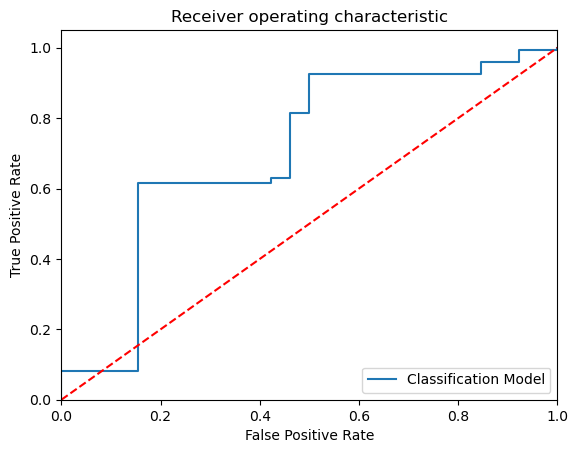

-----------------------------------------------------------------------------------------------------


In [25]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1= pd.concat([EMResults1, pd.DataFrame([new_row])], ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

# SVM -Polynomial

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[146   0]
 [ 21   5]]
Outcome values : 
 146 0 21 5
Classification report : 
               precision    recall  f1-score   support

           1       0.87      1.00      0.93       146
           0       1.00      0.19      0.32        26

    accuracy                           0.88       172
   macro avg       0.94      0.60      0.63       172
weighted avg       0.89      0.88      0.84       172

Accuracy : 87.8 %
Precision : 87.4 %
Recall : 100.0 %
F1 Score : 0.933
Specificity or True Negative Rate : 19.2 %
Balanced Accuracy : 59.6 %
MCC : 0.41
roc_auc_score: 0.596


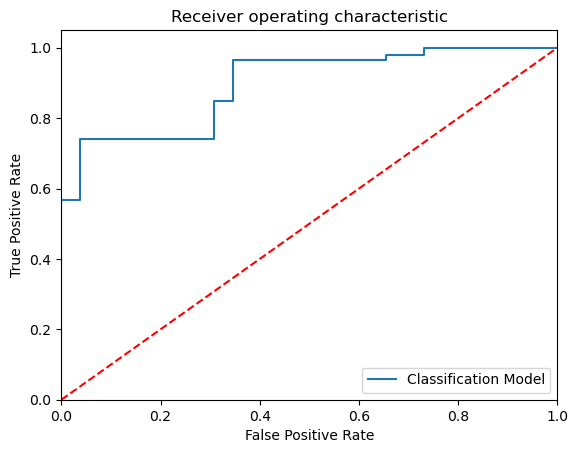

-----------------------------------------------------------------------------------------------------


In [26]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = pd.concat([EMResults1, pd.DataFrame([new_row])], ignore_index=True)
#-----------------------------------------------------------------------------------------------

# SVM sigmoid kernel

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[64 82]
 [13 13]]
Outcome values : 
 64 82 13 13
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.44      0.57       146
           0       0.14      0.50      0.21        26

    accuracy                           0.45       172
   macro avg       0.48      0.47      0.39       172
weighted avg       0.73      0.45      0.52       172

Accuracy : 44.8 %
Precision : 83.1 %
Recall : 43.8 %
F1 Score : 0.574
Specificity or True Negative Rate : 50.0 %
Balanced Accuracy : 46.9 %
MCC : -0.044
roc_auc_score: 0.469


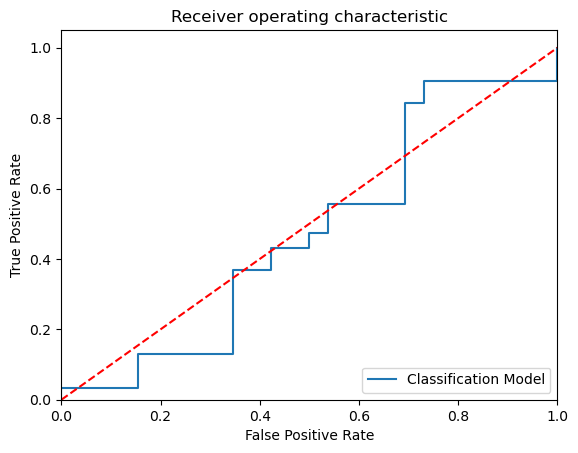

-----------------------------------------------------------------------------------------------------


In [27]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = pd.concat([EMResults1, pd.DataFrame([new_row])], ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

# SVM gaussian

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[127  19]
 [  1  25]]
Outcome values : 
 127 19 1 25
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.87      0.93       146
           0       0.57      0.96      0.71        26

    accuracy                           0.88       172
   macro avg       0.78      0.92      0.82       172
weighted avg       0.93      0.88      0.89       172

Accuracy : 88.4 %
Precision : 99.2 %
Recall : 87.0 %
F1 Score : 0.927
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 91.6 %
MCC : 0.683
roc_auc_score: 0.916


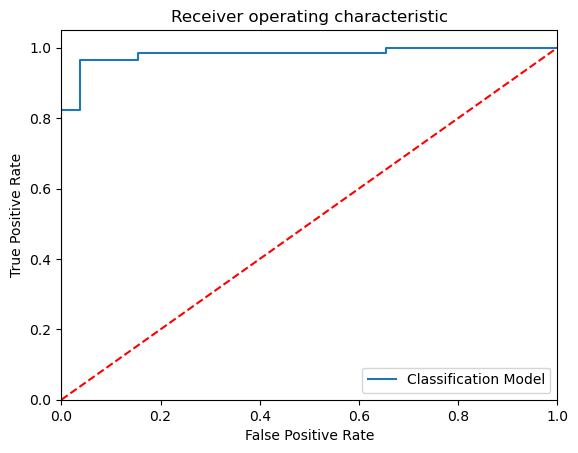

-----------------------------------------------------------------------------------------------------


In [28]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = pd.concat([EMResults1, pd.DataFrame([new_row])], ignore_index=True)

#---------------------------------------------------------------------------------------------------------------

In [29]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,146,0,26,0,0.849,0.849,1.000,0.918,0.000,NaN,0.500000,0.500
1,SVM - Polynominal,146,0,21,5,0.878,0.874,1.000,0.933,0.192,0.410,0.596154,0.596
2,SVM - Sigmoid,64,82,13,13,0.448,0.831,0.438,0.574,0.500,-0.044,0.469178,0.469
3,SVM - Gaussian,127,19,1,25,0.884,0.992,0.870,0.927,0.962,0.683,0.915701,0.916


In [30]:
EMResults=pd.read_csv(r"C:\22B91A5740\Projects\EMResults.csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# compare the algorithms

Model Name:  LogisticRegression()
Confusion matrix : 
 [[146   0]
 [ 26   0]]
Outcome values : 
 146 0 26 0
Classification report : 
               precision    recall  f1-score   support

           1       0.85      1.00      0.92       146
           0       0.00      0.00      0.00        26

    accuracy                           0.85       172
   macro avg       0.42      0.50      0.46       172
weighted avg       0.72      0.85      0.78       172

Accuracy : 84.9 %
Precision : 84.9 %
Recall : 100.0 %
F1 Score : 0.918
Specificity or True Negative Rate : 0.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


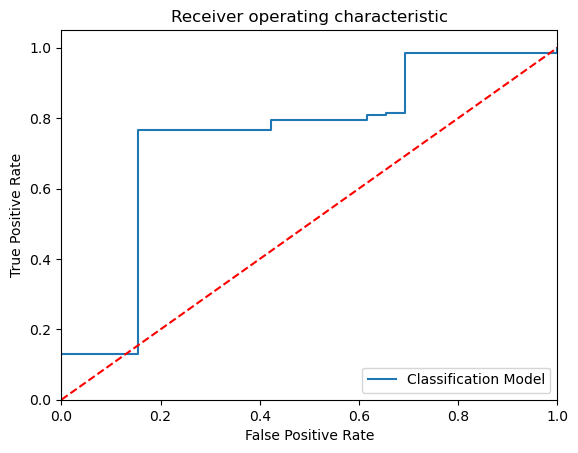

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[142   4]
 [ 21   5]]
Outcome values : 
 142 4 21 5
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.97      0.92       146
           0       0.56      0.19      0.29        26

    accuracy                           0.85       172
   macro avg       0.71      0.58      0.60       172
weighted avg       0.82      0.85      0.82       172

Accuracy : 85.5 %
Precision : 87.1 %
Recall : 97.3 %
F1 Score : 0.919
Specificity or True Negative Rate : 19.2 %
Balanced Accuracy : 58.2 %
MCC : 0.265
roc_auc_score: 0.582


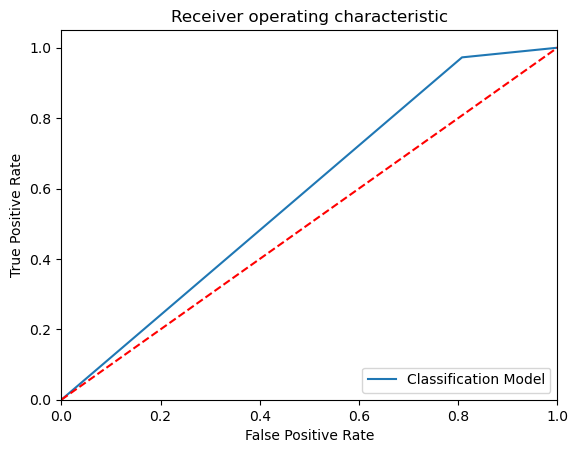

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[146   0]
 [ 24   2]]
Outcome values : 
 146 0 24 2
Classification report : 
               precision    recall  f1-score   support

           1       0.86      1.00      0.92       146
           0       1.00      0.08      0.14        26

    accuracy                           0.86       172
   macro avg       0.93      0.54      0.53       172
weighted avg       0.88      0.86      0.81       172

Accuracy : 86.0 %
Precision : 85.9 %
Recall : 100.0 %
F1 Score : 0.924
Specificity or True Negative Rate : 7.7 %
Balanced Accuracy : 53.8 %
MCC : 0.257
roc_auc_score: 0.538


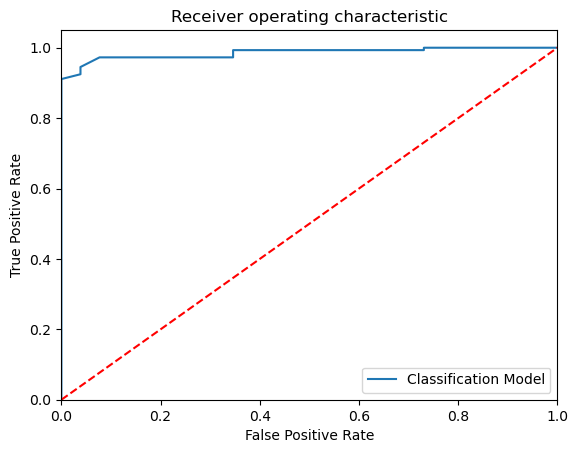

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[146   0]
 [ 21   5]]
Outcome values : 
 146 0 21 5
Classification report : 
               precision    recall  f1-score   support

           1       0.87      1.00      0.93       146
           0       1.00      0.19      0.32        26

    accuracy                           0.88       172
   macro avg       0.94      0.60      0.63       172
weighted avg       0.89      0.88      0.84       172

Accuracy : 87.8 %
Precision : 87.4 %
Recall : 100.0 %
F1 Score : 0.933
Specificity or True Negative Rate : 19.2 %
Balanced Accuracy : 59.6 %
MCC : 0.41
roc_auc_score: 0.596


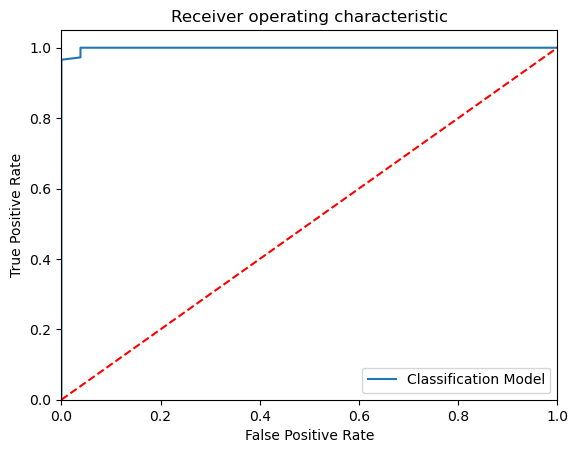

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[140   6]
 [  1  25]]
Outcome values : 
 140 6 1 25
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.96      0.98       146
           0       0.81      0.96      0.88        26

    accuracy                           0.96       172
   macro avg       0.90      0.96      0.93       172
weighted avg       0.96      0.96      0.96       172

Accuracy : 95.9 %
Precision : 99.3 %
Recall : 95.9 %
F1 Score : 0.976
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 96.0 %
MCC : 0.858
roc_auc_score: 0.96


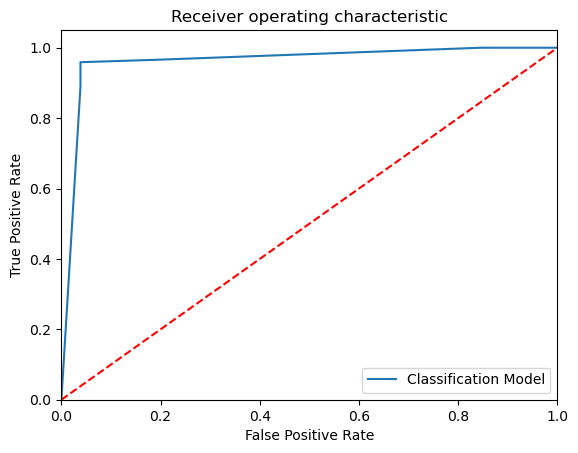

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[127  19]
 [  1  25]]
Outcome values : 
 127 19 1 25
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.87      0.93       146
           0       0.57      0.96      0.71        26

    accuracy                           0.88       172
   macro avg       0.78      0.92      0.82       172
weighted avg       0.93      0.88      0.89       172

Accuracy : 88.4 %
Precision : 99.2 %
Recall : 87.0 %
F1 Score : 0.927
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 91.6 %
MCC : 0.683
roc_auc_score: 0.916


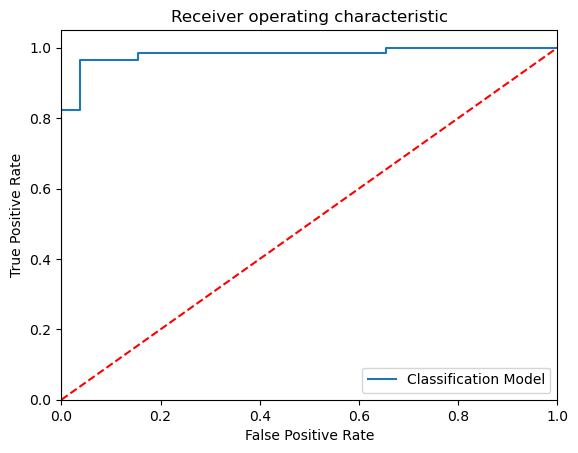

-----------------------------------------------------------------------------------------------------


In [31]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults1 = pd.concat([EMResults1, pd.DataFrame([new_row])], ignore_index=True)
    #------------------------------------------------------------------------------------------------------------------


In [32]:
EMResults1.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,146,0,26,0,0.849,0.849,1.000,0.918,0.000,NaN,0.500000,0.500
1,SVM - Polynominal,146,0,21,5,0.878,0.874,1.000,0.933,0.192,0.410,0.596154,0.596
2,SVM - Sigmoid,64,82,13,13,0.448,0.831,0.438,0.574,0.500,-0.044,0.469178,0.469
3,SVM - Gaussian,127,19,1,25,0.884,0.992,0.870,0.927,0.962,0.683,0.915701,0.916
4,LogisticRegression(),146,0,26,0,0.849,0.849,1.000,0.918,0.000,NaN,0.500000,0.500
5,DecisionTreeClassifier(),142,4,21,5,0.855,0.871,0.973,0.919,0.192,0.265,0.582455,0.582
6,"(DecisionTreeClassifier(max_features='sqrt', r...",146,0,24,2,0.860,0.859,1.000,0.924,0.077,0.257,0.538462,0.538
7,"(ExtraTreeClassifier(random_state=1686926543),...",146,0,21,5,0.878,0.874,1.000,0.933,0.192,0.410,0.596154,0.596
8,KNeighborsClassifier(),140,6,1,25,0.959,0.993,0.959,0.976,0.962,0.858,0.960221,0.960
9,"SVC(class_weight='balanced', probability=True,...",127,19,1,25,0.884,0.992,0.870,0.927,0.962,0.683,0.915701,0.916


In [33]:
#predicting the value using the decision tree
#predict the values with KNN algorithm
y_pred=ModelRF.predict(x_test)

In [34]:
#display the final results 
Results = pd.DataFrame({'Status_A':y_test, 'Status_P':y_pred})
#Merge two Dataframes on index of both the dataframes
ResultsFinal = forest_fires_bk.merge(Results,left_index=True,right_index=True)
# Calculate the %of Error
ResultsFinal['%Error'] = ResultsFinal.apply(
    lambda row: 0 if row['Status_A'] == 0 else round(((row['Status_A'] - row['Status_P']) / row['Status_A']) * 100, 3),axis=1)
#display 10 records randomly
ResultsFinal.sample(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Status,Status_A,Status_P,%Error
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00,1,1,1,0.0
284,5,4,feb,fri,85.2,4.9,15.8,6.3,7.5,46,8.0,0.0,24.24,1,1,1,0.0
70,4,5,mar,fri,91.2,48.3,97.8,12.5,15.8,27,7.6,0.0,0.00,1,1,1,0.0
433,2,4,aug,sun,93.6,235.1,723.1,10.1,20.9,66,4.9,0.0,15.34,1,1,1,0.0
375,6,5,sep,sat,91.2,94.3,744.4,8.4,15.4,57,4.9,0.0,39.35,1,1,1,0.0
72,5,4,mar,fri,91.7,33.3,77.5,9.0,15.6,25,6.3,0.0,0.00,1,1,1,0.0
485,2,4,aug,mon,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,2.07,1,1,1,0.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1,1,1,0.0
245,3,4,aug,sun,91.8,175.1,700.7,13.8,26.8,38,6.3,0.0,0.76,1,1,1,0.0
29,6,3,sep,sun,93.5,149.3,728.6,8.1,22.8,39,3.6,0.0,0.00,1,1,1,0.0
